In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Defines the maze environment

Env = np.zeros([20, 20])
Env[:, [0]] = 1
Env[:, [19]] = 1
Env[0, :] = 1
Env[19, :] = 1

Env[1, 11] = 3; Env[1, 12] = 3
Env[2, 1:4] = [3, 3, 3]; Env[2, 5] = 1; Env[2, 8] = 2; Env[2, 16] = 2
Env[3, 5] = 1; Env[3, 13] = 5   # Goal cell defined here (value 5)
Env[4, 2] = 2; Env[4, 3:17] = np.ones([1, 14])
Env[5, 1] = 3; Env[5, 3] = 1; Env[5, 6] = 2; Env[5, 9] = 3; Env[5, 17] = 3
Env[6, 3] = 1; Env[6, 6] = 1; Env[6, 9] = 1; Env[6, 15] = 1; Env[6, 17] = 3
Env[7, 2] = 3; Env[7, 3] = 1; Env[7, 6] = 1; Env[7, 9] = 1
Env[7, 10:12] = [3, 3]; Env[7, 12:16] = np.ones([1, 4]); Env[7, 17] = 3
Env[8, 6] = 1; Env[8, 9] = 1; Env[8, 15] = 1; Env[8, 17] = 3
Env[9, 6] = 1; Env[9, 9] = 1; Env[9, 15] = 1
Env[10, 1:5] = np.ones([1, 4]); Env[10, 6] = 1; Env[10, 9:11] = [1, 1]
Env[10, 15] = 1; Env[10, 18] = 2
Env[11, 6] = 1; Env[11, 10] = 1; Env[11, 13] = 1; Env[11, 15:18] = [1, 1, 1]
Env[12, 3:8] = np.ones([1, 5]); Env[12, 10] = 1; Env[12, 11:13] = [3, 3]
Env[12, 13] = 1; Env[12, 17] = 1
Env[13, 7] = 1; Env[13, 10] = 1; Env[13, 13] = 1; Env[13, 17] = 1
Env[14, 1:3] = [3, 3]; Env[14, 7] = 1; Env[14, 10] = 1; Env[14, 13] = 1
Env[15, 4] = 4; Env[15, 7] = 1; Env[15, 10] = 2; 
Env[15, 13:17] = [1, 1, 1, 1]; Env[15, 17:19] = [3, 3]
Env[16, 7] = 3; Env[16, 10] = 2
Env[17, 1:3] = [1, 1]; Env[17, 7:13] = [1, 1, 1, 1, 1, 1]
Env[17, 14] = 2; Env[17, 17] = 2
Env[18, 7] = 2

In [5]:
# Define the colors for printing the maze

colors = {
    0: [1, 1, 1],        # White
    1: [0, 0, 0],        # Wall (Black)
    2: [0.55, 0, 0],     # Oil (Brown)
    3: [0.96, 0.8, 0.6],  # Bump
    4: [0, 0, 1],        # Start (Green)
    5: [0, 1, 0]         # Goal (Blue)
}

In [7]:
# Function to visualize/print the maze

def visualize_maze(Env):
    plt.figure(figsize=(15, 10))
    sns.heatmap(Env, fmt="", cmap=sns.color_palette([colors[i] for i in range(6)]),
                cbar=False, annot=False, linewidths=0.5, linecolor='black')
    plt.axis('off')
    plt.title('Maze Problem')
    plt.show()

In [9]:
# Defines the state matrix with the valid state numbers

State_Matrix = np.array([
 [0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0],
 [0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18, 0],
 [0,  19,  20,  21,  22,   0,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35, 0],
 [0,  36,  37,  38,  39,   0,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52, 0],
 [0,  53,  54,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  55,  56, 0],
 [0,  57,  58,   0,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73, 0],
 [0,  74,  75,   0,  76,  77,   0,  78,  79,   0,  80,  81,  82,  83,  84,   0,  85,  86,  87, 0],
 [0,  88,  89,   0,  90,  91,   0,  92,  93,   0,  94,  95,   0,   0,   0,   0,  96,  97,  98, 0],
 [0,  99, 100, 101, 102, 103,   0, 104, 105,   0, 106, 107, 108, 109, 110,   0, 111, 112, 113, 0],
 [0, 114, 115, 116, 117, 118,   0, 119, 120,   0, 121, 122, 123, 124, 125,   0, 126, 127, 128, 0],
 [0,   0,   0,   0,   0, 129,   0, 130, 131,   0,   0, 132, 133, 134, 135,   0, 136, 137, 138, 0],
 [0, 139, 140, 141, 142, 143,   0, 144, 145, 146,   0, 147, 148,   0, 149,   0,   0,   0, 150, 0],
 [0, 151, 152,   0,   0,   0,   0,   0, 153, 154,   0, 155, 156,   0, 157, 158, 159,   0, 160, 0],
 [0, 161, 162, 163, 164, 165, 166,   0, 167, 168,   0, 169, 170,   0, 171, 172, 173,   0, 174, 0],
 [0, 175, 176, 177, 178, 179, 180,   0, 181, 182,   0, 183, 184,   0, 185, 186, 187, 188, 189, 0],
 [0, 190, 191, 192, 193, 194, 195,   0, 196, 197, 198, 199, 200,   0,   0,   0,   0, 201, 202, 0],
 [0, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 0],
 [0,   0,   0, 221, 222, 223, 224,   0,   0,   0,   0,   0,   0, 225, 226, 227, 228, 229, 230, 0],
 [0, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 0],
 [0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0]
])

# Encodings for the actions
A_UP, A_RIGHT, A_DOWN, A_LEFT = 0, 1, 2, 3

In [11]:
# Helper functions to ease state to state movement of agent

def is_wall(r, c, Env):
    rows, cols = Env.shape
    if r < 0 or r >= rows or c < 0 or c >= cols:
        return True
    return (Env[r, c] == 1)

def next_cell(r, c, action):
    if action == A_UP:
        return (r-1, c)
    elif action == A_RIGHT:
        return (r, c+1)
    elif action == A_DOWN:
        return (r+1, c)
    elif action == A_LEFT:
        return (r, c-1)

def get_perpendicular_actions(a):
    if a == A_UP:
        return [A_LEFT, A_RIGHT]
    elif a == A_RIGHT:
        return [A_UP, A_DOWN]
    elif a == A_DOWN:
        return [A_RIGHT, A_LEFT]
    elif a == A_LEFT:
        return [A_DOWN, A_UP]

def create_lookup_tables(State_Matrix):
    rows, cols = State_Matrix.shape
    num_states = np.max(State_Matrix)
    state_to_rc = [None]*(num_states+1)  # Using 1-indexing (states 1..248)
    rc_to_state = {}
    for r in range(rows):
        for c in range(cols):
            s = State_Matrix[r, c]
            if s != 0:
                state_to_rc[s] = (r, c)
                rc_to_state[(r, c)] = s
    return state_to_rc, rc_to_state

def find_start_and_goal(Env, rc_to_state):
    s_start, s_goal = None, None
    rows, cols = Env.shape
    for r in range(rows):
        for c in range(cols):
            if Env[r,c] == 4:
                s_start = rc_to_state[(r,c)]
            elif Env[r,c] == 5:
                s_goal = rc_to_state[(r,c)]
    return s_start, s_goal

In [13]:
# Functions to compute and build the transition probabilities and rewards model

def step_reward_and_next_state(s, a, Env, state_to_rc, rc_to_state):
    
    # Terminalize the goal so that once reached, the agent remains with 0 reward.
    
    (r, c) = state_to_rc[s]
    # If already at goal, remain with 0 reward.
    if Env[r, c] == 5:
        return (s, 0)
    (r_next, c_next) = next_cell(r, c, a)
    if is_wall(r_next, c_next, Env):
        return (s, -1.8)
    else:
        s_next = rc_to_state[(r_next, c_next)]
        cell_type = Env[r_next, c_next]
        if cell_type == 2:
            return (s_next, -6)
        elif cell_type == 3:
            return (s_next, -11)
        elif cell_type == 5:
            # When stepping into goal, we get +300 on that transition,
            # but then the goal is terminal and its value will be forced to 0.
            return (s_next, 300)
        else:
            return (s_next, -1)

def transition_probabilities(s, a, Env, p, state_to_rc, rc_to_state):
    s_int, _ = step_reward_and_next_state(s, a, Env, state_to_rc, rc_to_state)
    p_actions = get_perpendicular_actions(a)
    s_p1, _ = step_reward_and_next_state(s, p_actions[0], Env, state_to_rc, rc_to_state)
    s_p2, _ = step_reward_and_next_state(s, p_actions[1], Env, state_to_rc, rc_to_state)
    
    probs = {}
    intended_prob = 1.0 - p
    if s_p1 == s:
        intended_prob += (p/2)
    else:
        probs[s_p1] = probs.get(s_p1, 0.0) + (p/2)
    if s_p2 == s:
        intended_prob += (p/2)
    else:
        probs[s_p2] = probs.get(s_p2, 0.0) + (p/2)
    probs[s_int] = probs.get(s_int, 0.0) + intended_prob
    return probs

def transition_rewards(s, a, Env, p, state_to_rc, rc_to_state):
    s_int, r_int = step_reward_and_next_state(s, a, Env, state_to_rc, rc_to_state)
    p_actions = get_perpendicular_actions(a)
    s_p1, r_p1 = step_reward_and_next_state(s, p_actions[0], Env, state_to_rc, rc_to_state)
    s_p2, r_p2 = step_reward_and_next_state(s, p_actions[1], Env, state_to_rc, rc_to_state)
    rewards = {}
    rewards[s_int] = r_int
    rewards[s_p1]  = r_p1
    rewards[s_p2]  = r_p2
    return rewards

def build_transition_model(Env, p, state_to_rc, rc_to_state):
    """
    Build P and R arrays for all states (1..num_states) and actions in [A_UP, A_RIGHT, A_DOWN, A_LEFT].
    P[s, a, s_next], R[s, a, s_next].
    We'll fill these by calling transition_probabilities(...) and transition_rewards(...).
    """
    num_states = np.max(State_Matrix)
    num_actions = 4
    P = np.zeros((num_states+1, num_actions, num_states+1))
    R = np.zeros((num_states+1, num_actions, num_states+1))

    for s in range(1, num_states+1):
        for a in [A_UP, A_RIGHT, A_DOWN, A_LEFT]:
            probs = transition_probabilities(s, a, Env, p, state_to_rc, rc_to_state)
            rews  = transition_rewards(s, a, Env, p, state_to_rc, rc_to_state)
            a_idx = a  # 0..3
            for s_next, prob in probs.items():
                P[s, a_idx, s_next] = prob
                R[s, a_idx, s_next] = rews[s_next]
    return P, R


In [15]:
# Policy Iteration Technique

def policy_evaluation(pi, Env, p, gamma, theta, state_to_rc, rc_to_state, num_states):
    V = np.zeros(num_states+1)
    # Identify goal state index:
    s_goal = None
    for s in range(1, num_states+1):
        (gr, gc) = state_to_rc[s]
        if Env[gr, gc] == 5:
            s_goal = s
            break

    while True:
        V_new = np.zeros(num_states+1)
        for s in range(1, num_states+1):
            if s == s_goal:
                V_new[s] = 0  # Force goal state value to 0
                continue
            a = pi[s]
            probs = transition_probabilities(s, a, Env, p, state_to_rc, rc_to_state)
            rews  = transition_rewards(s, a, Env, p, state_to_rc, rc_to_state)
            val = 0
            for s_next, prob in probs.items():
                r = rews[s_next]
                val += prob * (r + gamma * V[s_next])
            V_new[s] = val
        delta = np.max(np.abs(V_new - V))
        V = V_new
        if delta < theta:
            break
    return V

def policy_improvement(V, Env, p, gamma, state_to_rc, rc_to_state, num_states):
    pi_new = np.zeros(num_states+1, dtype=int)
    # Identify goal state index:
    s_goal = None
    for s in range(1, num_states+1):
        (gr, gc) = state_to_rc[s]
        if Env[gr, gc] == 5:
            s_goal = s
            break

    for s in range(1, num_states+1):
        if s == s_goal:
            pi_new[s] = 0  # Arbitrary action at goal
            continue
        best_val = -1e9
        best_a = 0
        for a in [A_UP, A_RIGHT, A_DOWN, A_LEFT]:
            probs = transition_probabilities(s, a, Env, p, state_to_rc, rc_to_state)
            rews  = transition_rewards(s, a, Env, p, state_to_rc, rc_to_state)
            Q_sa = 0
            for s_next, prob in probs.items():
                r = rews[s_next]
                Q_sa += prob * (r + gamma * V[s_next])
            if Q_sa > best_val:
                best_val = Q_sa
                best_a = a
        pi_new[s] = best_a
    return pi_new

def policy_iteration(Env, p, gamma, theta, state_to_rc, rc_to_state, num_states, tol=1e-3):
    pi = np.full(num_states+1, A_LEFT, dtype=int)
    iteration = 0
    while True:
        iteration += 1
        V = policy_evaluation(pi, Env, p, gamma, theta, state_to_rc, rc_to_state, num_states)
        pi_new = policy_improvement(V, Env, p, gamma, state_to_rc, rc_to_state, num_states)
        if np.linalg.norm(pi_new - pi, ord=1) < tol:
            print(f"Policy Iteration converged at iteration {iteration}")
            break
        pi = pi_new
    return pi, V

def extract_path(pi, s_start, s_goal, Env, p, state_to_rc, rc_to_state, max_steps=1000):
    path = []
    s = s_start
    for _ in range(max_steps):
        path.append(s)
        if s == s_goal:
            break
        a = pi[s]
        # Follow deterministic intended transition
        s_next, _ = step_reward_and_next_state(s, a, Env, state_to_rc, rc_to_state)
        s = s_next
    return path

In [17]:
# Visualize the maze with optimal state values, optimal policy and the optimal path

def plot_value_function(V, State_Matrix, state_to_rc, Env, title="Value Function"):
    ann = np.full_like(State_Matrix, "", dtype=object)
    rows, cols = State_Matrix.shape
    for r in range(rows):
        for c in range(cols):
            s = State_Matrix[r,c]
            if s != 0:
                ann[r,c] = f"{V[s]:.0f}"
    plt.figure(figsize=(12, 8))
    sns.heatmap(Env, fmt="", cmap=sns.color_palette([colors[i] for i in range(6)]),
                cbar=False, annot=ann, linewidths=0.5, linecolor='black')
    plt.axis('off')
    plt.title(title)
    plt.show()

def plot_policy(pi, State_Matrix, Env, title="Policy"):
    plt.figure(figsize=(12, 8))
    sns.heatmap(Env, fmt="", cmap=sns.color_palette([colors[i] for i in range(6)]),
                cbar=False, annot=False, linewidths=0.5, linecolor='black')
    plt.axis('off')
    plt.title(title)
    rows, cols = State_Matrix.shape
    for r in range(rows):
        for c in range(cols):
            s = State_Matrix[r,c]
            if s != 0:
                a = pi[s]
                if a == A_UP:
                    plt.arrow(c+0.5, r+0.85, 0, -0.3, width=0.03, color='black')
                elif a == A_RIGHT:
                    plt.arrow(c+0.15, r+0.5, 0.3, 0, width=0.03, color='black')
                elif a == A_DOWN:
                    plt.arrow(c+0.5, r+0.15, 0, 0.3, width=0.03, color='black')
                elif a == A_LEFT:
                    plt.arrow(c+0.85, r+0.5, -0.3, 0, width=0.03, color='black')
    plt.show()

def plot_path(path, State_Matrix, state_to_rc, Env, title="Optimal Path"):
    plt.figure(figsize=(12, 8))
    sns.heatmap(Env, fmt="", cmap=sns.color_palette([colors[i] for i in range(6)]),
                cbar=False, annot=False, linewidths=0.5, linecolor='black')
    plt.axis('off')
    plt.title(title)
    for i in range(len(path)-1):
        s = path[i]
        s_next = path[i+1]
        (r, c) = state_to_rc[s]
        (r_next, c_next) = state_to_rc[s_next]
        plt.arrow(c+0.5, r+0.5, (c_next-c), (r_next-r),
                  length_includes_head=True, width=0.02, color='black')
    plt.show()

Policy Iteration converged at iteration 17


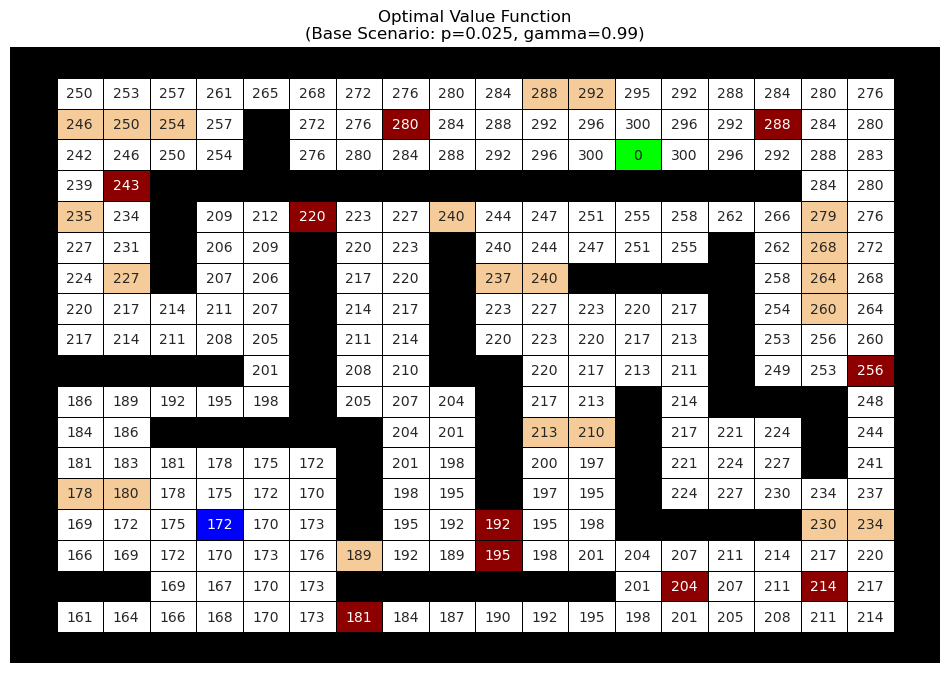

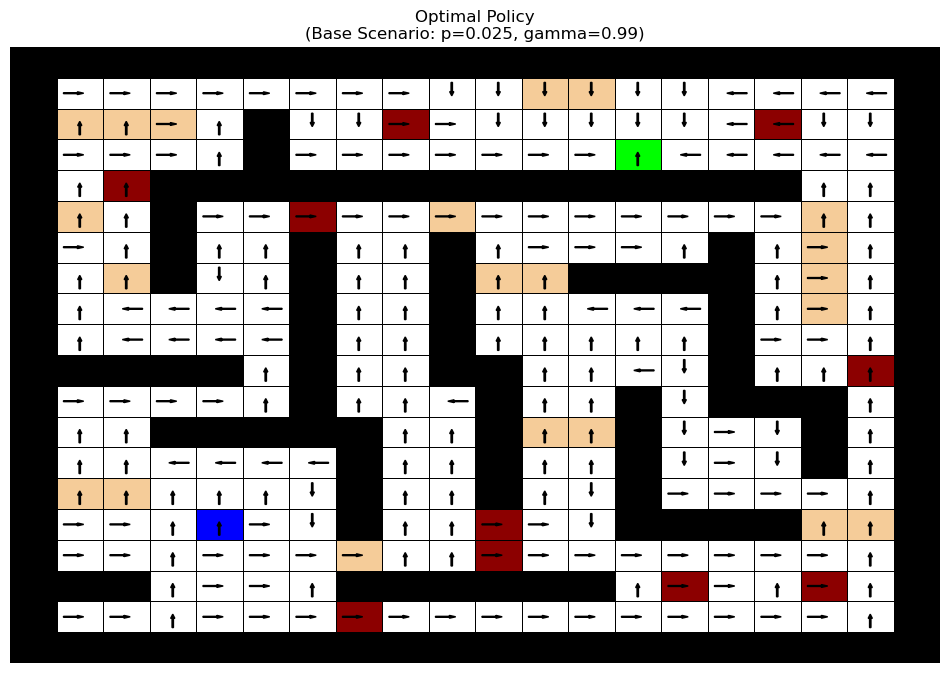

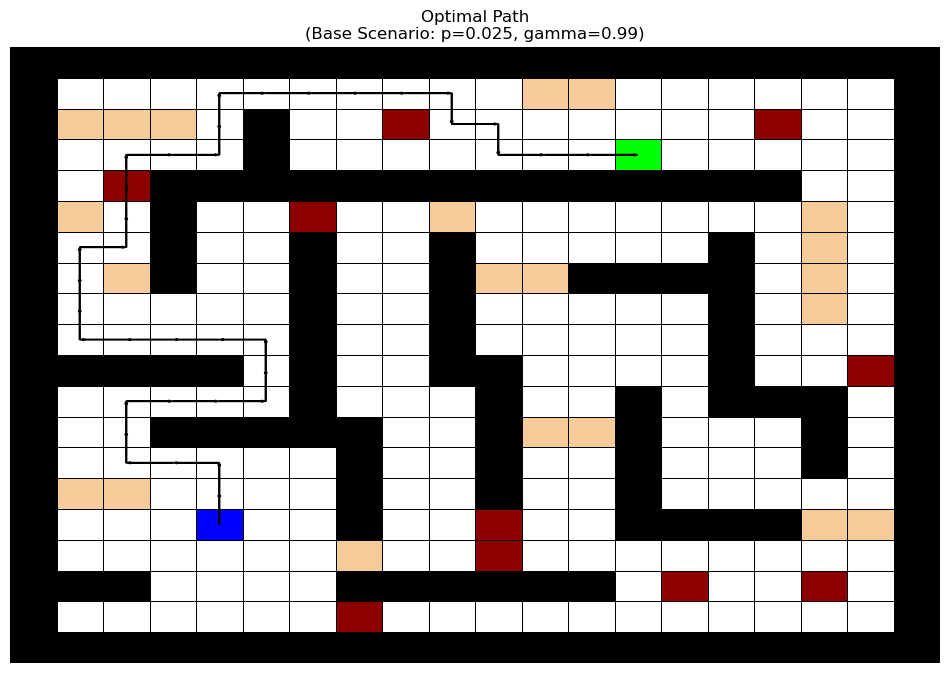

Policy Iteration converged at iteration 14


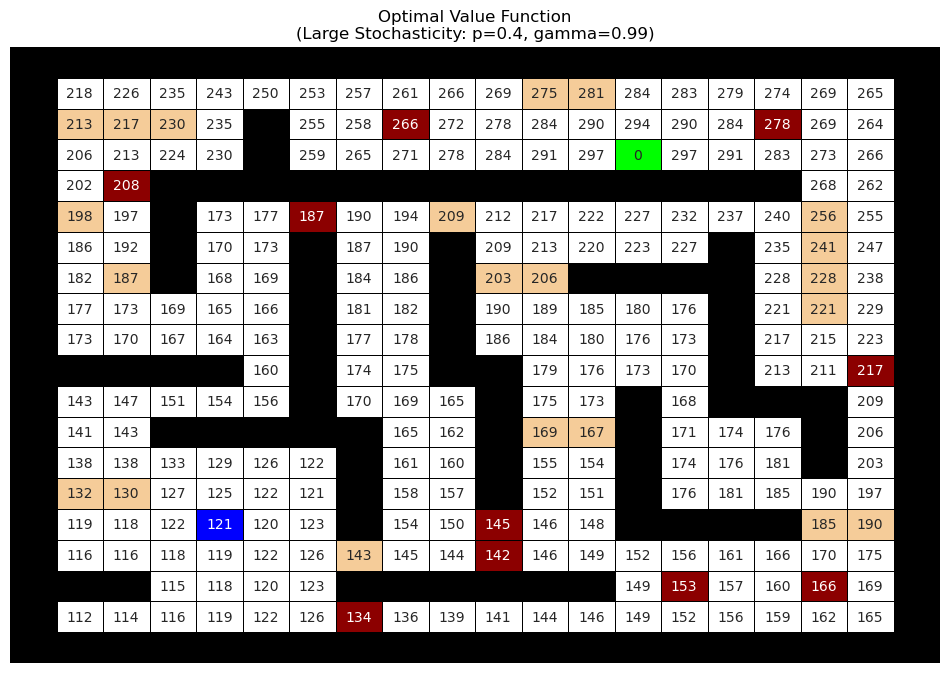

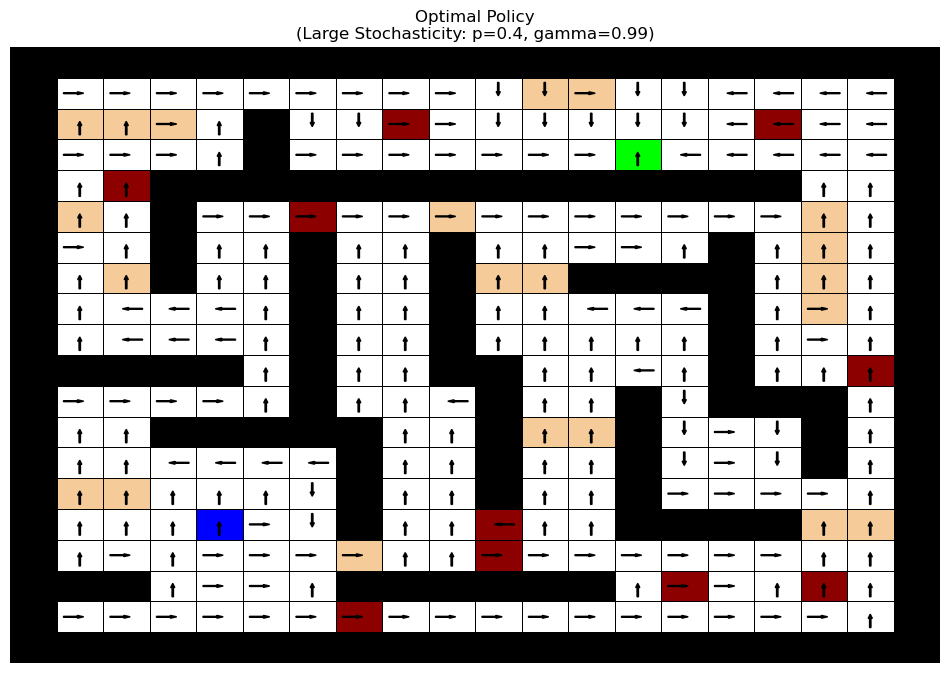

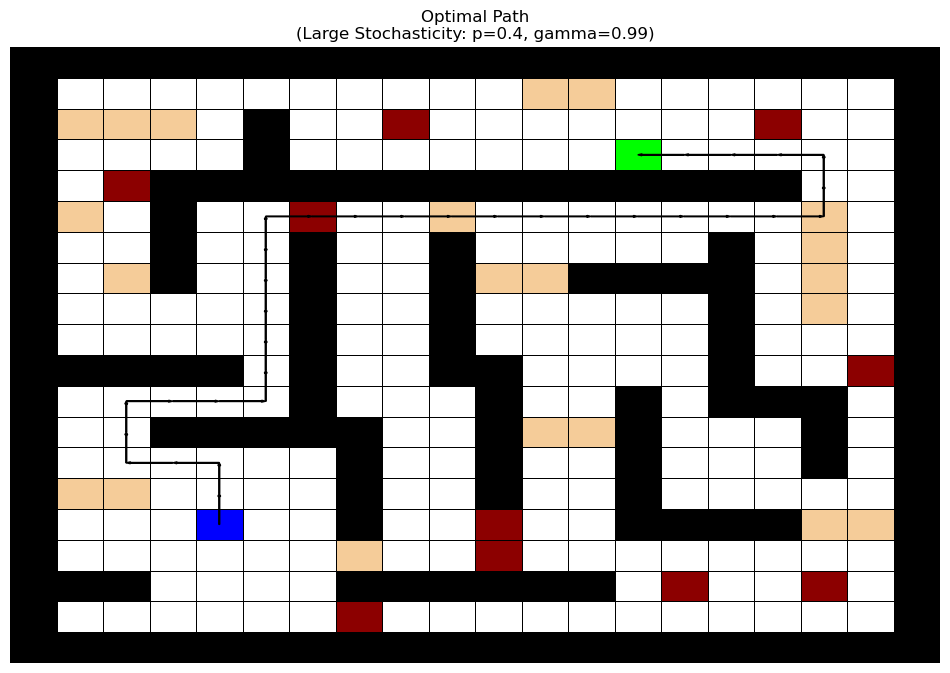

Policy Iteration converged at iteration 6


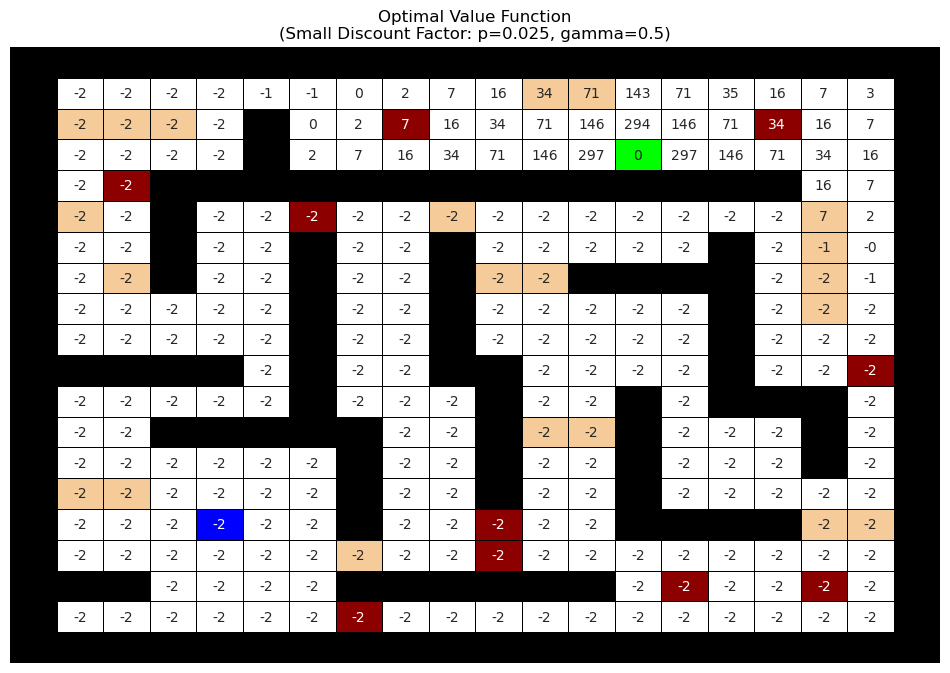

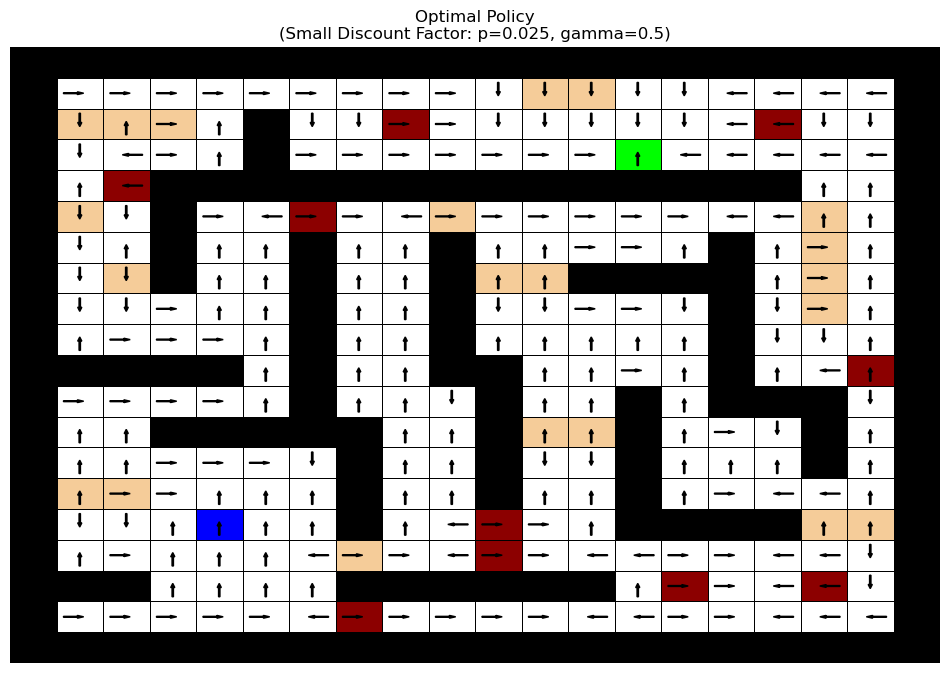

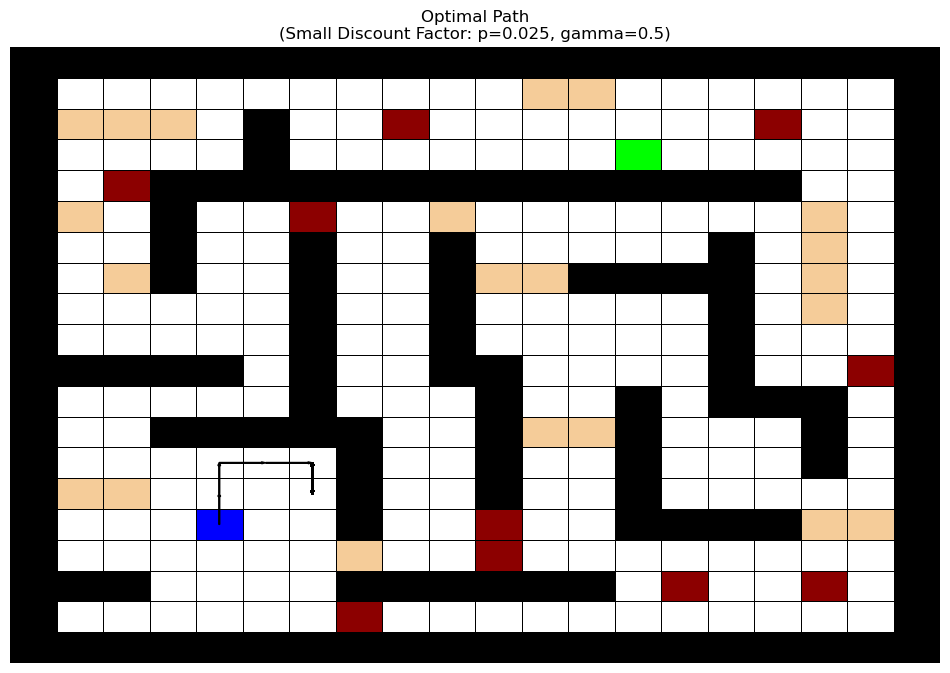

In [19]:
# Implement Policy Iteration for the Base, Large Stochasticity and Small Discount Factor Scenarios

def main():
    # Build lookup tables
    state_to_rc, rc_to_state = create_lookup_tables(State_Matrix)
    num_states = np.max(State_Matrix)  # 248

    # Find start and goal state indices
    s_start, s_goal = find_start_and_goal(Env, rc_to_state)

    # Define the 3 scenarios
    scenarios = [
        {"p": 0.025, "gamma": 0.99, "theta": 0.01, "name": "Base Scenario"},
        {"p": 0.4,   "gamma": 0.99, "theta": 0.01, "name": "Large Stochasticity"},
        {"p": 0.025, "gamma": 0.5,  "theta": 0.01, "name": "Small Discount Factor"}
    ]

    for sc in scenarios:
        p = sc["p"]
        gamma = sc["gamma"]
        theta = sc["theta"]
        name = sc["name"]

        # Build transition model (P and R)
        P, R = build_transition_model(Env, p, state_to_rc, rc_to_state)

        # Run policy iteration
        pi_opt, V_opt = policy_iteration(Env, p, gamma, theta, state_to_rc, rc_to_state, num_states)

        # Plot Value Function
        plot_value_function(V_opt, State_Matrix, state_to_rc, Env, title=f"Optimal Value Function\n({name}: p={p}, gamma={gamma})")
        
        # Plot Policy
        plot_policy(pi_opt, State_Matrix, Env, title=f"Optimal Policy\n({name}: p={p}, gamma={gamma})")
        
        # Extract and Plot Optimal Path
        path_states = extract_path(pi_opt, s_start, s_goal, Env, p, state_to_rc, rc_to_state)
        plot_path(path_states, State_Matrix, state_to_rc, Env, title=f"Optimal Path\n({name}: p={p}, gamma={gamma})")

if __name__ == "__main__":
    main()

Value Iteration converged at iteration 52


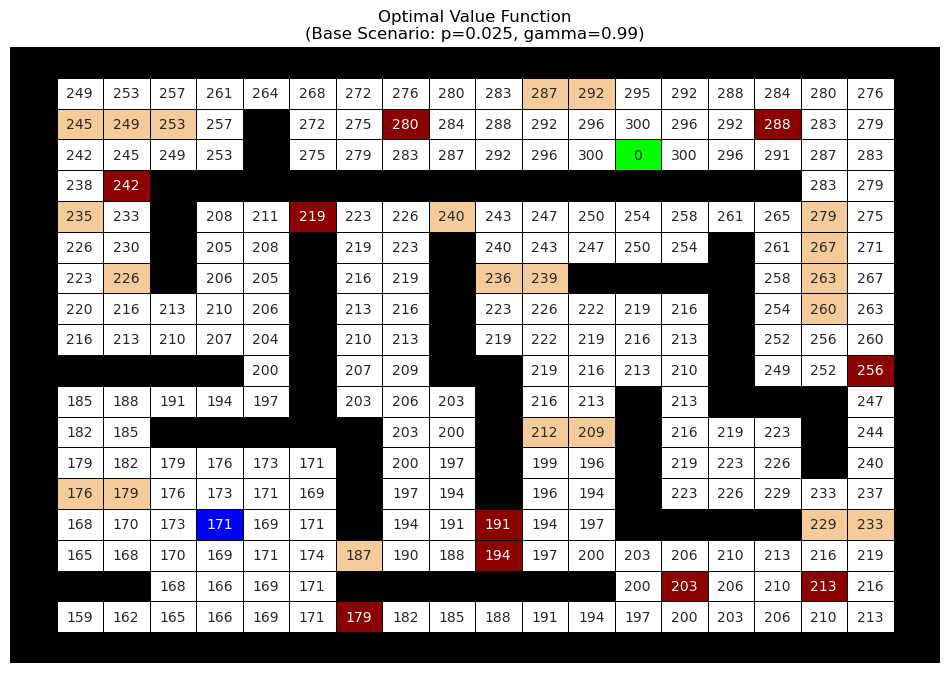

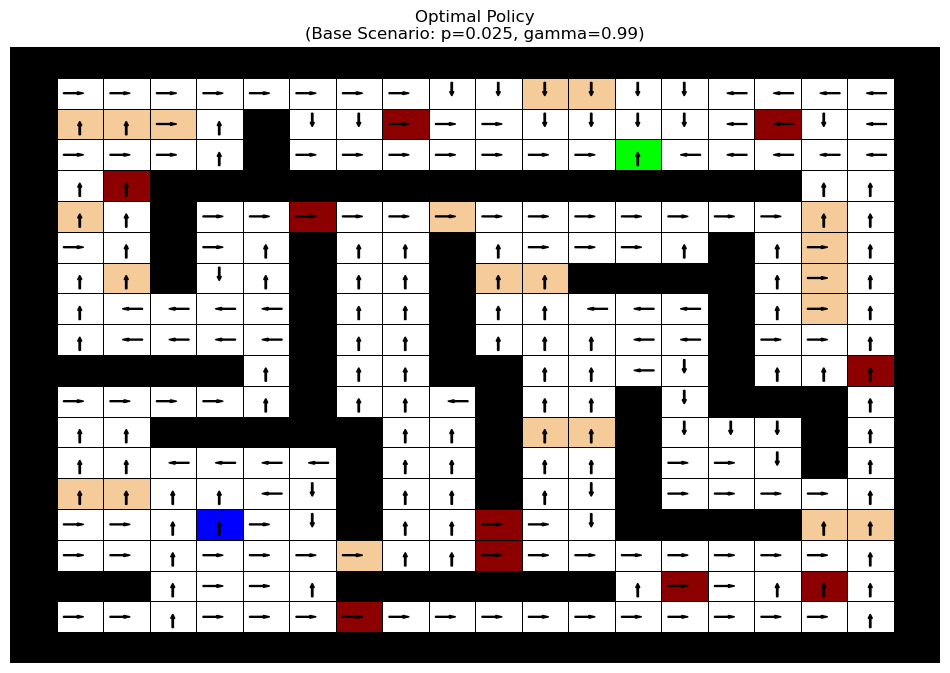

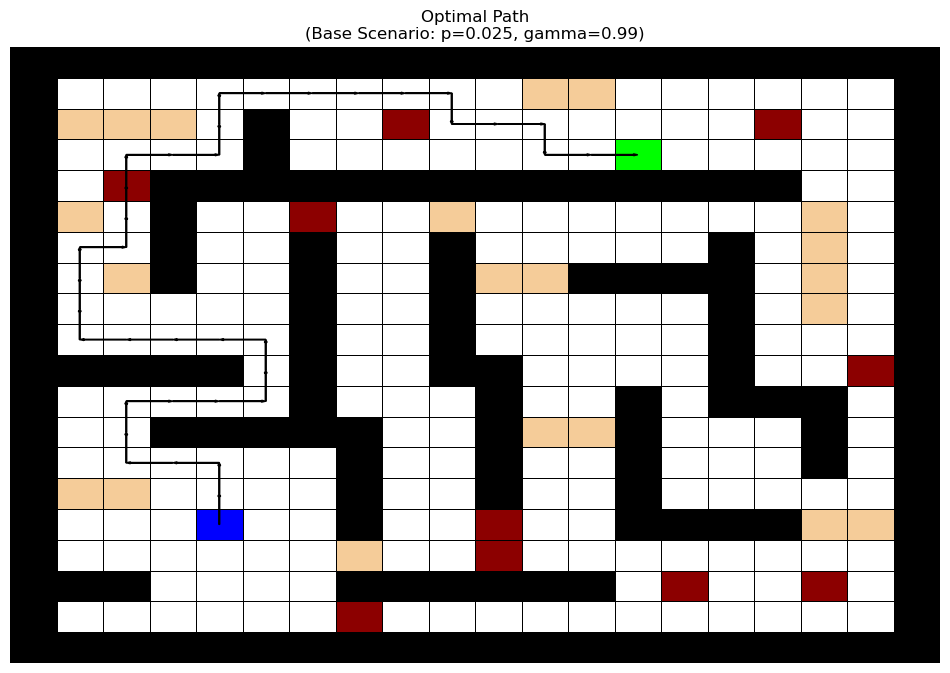

Value Iteration converged at iteration 110


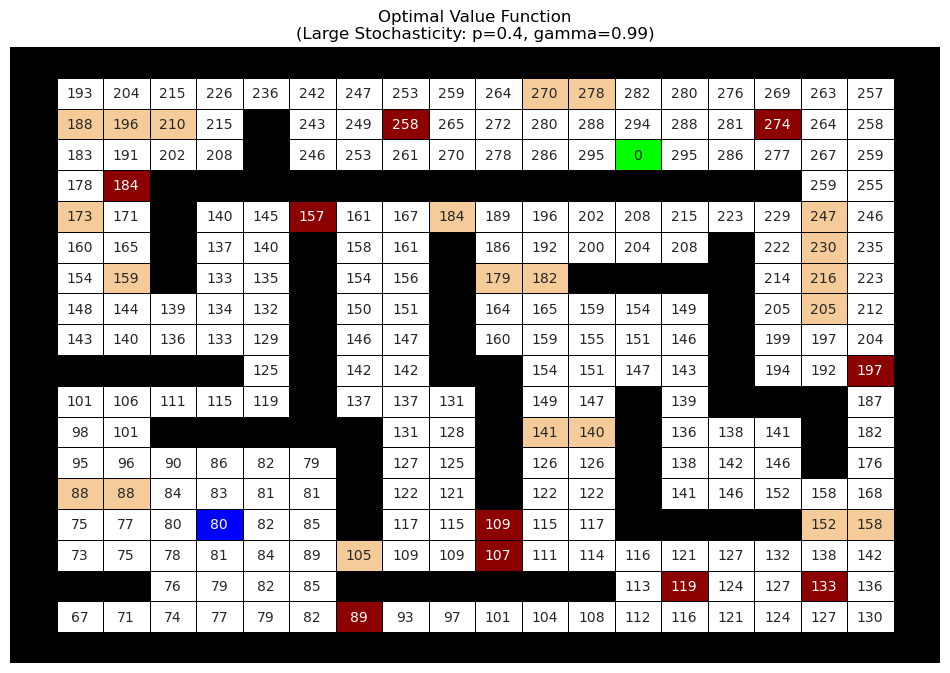

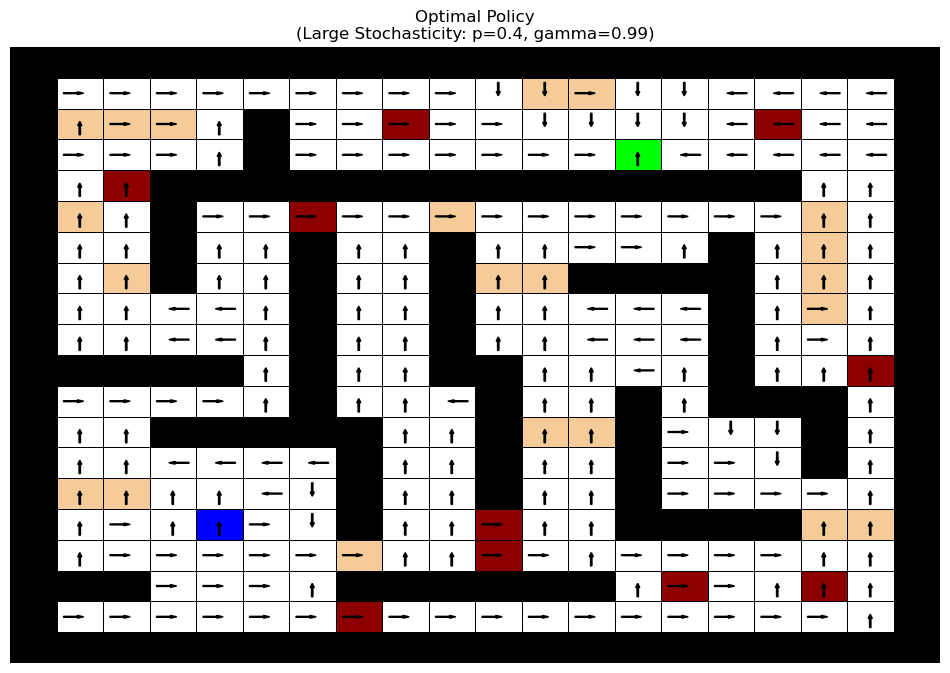

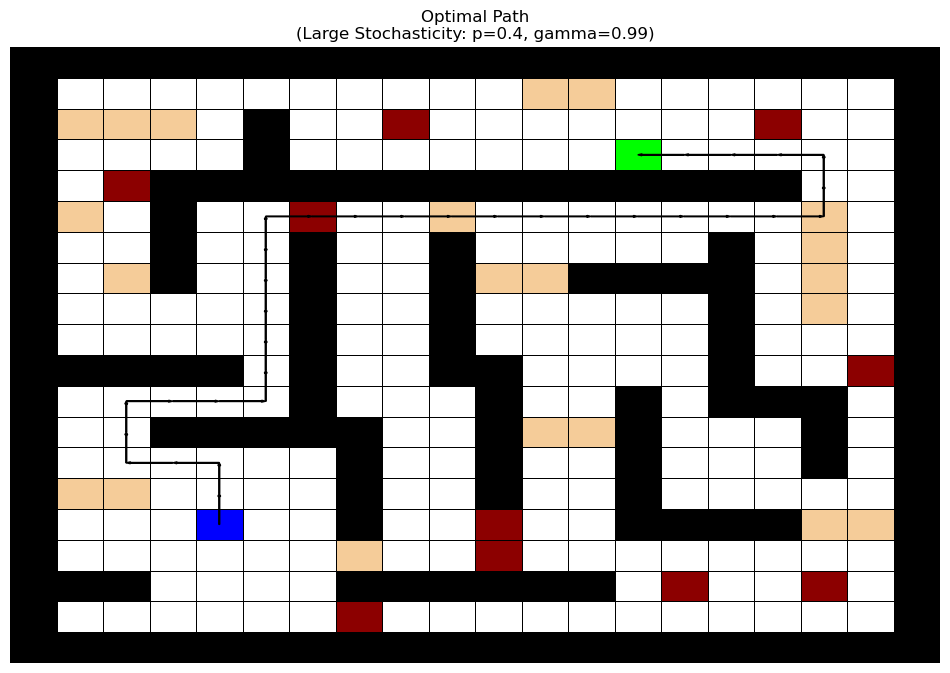

Value Iteration converged at iteration 15


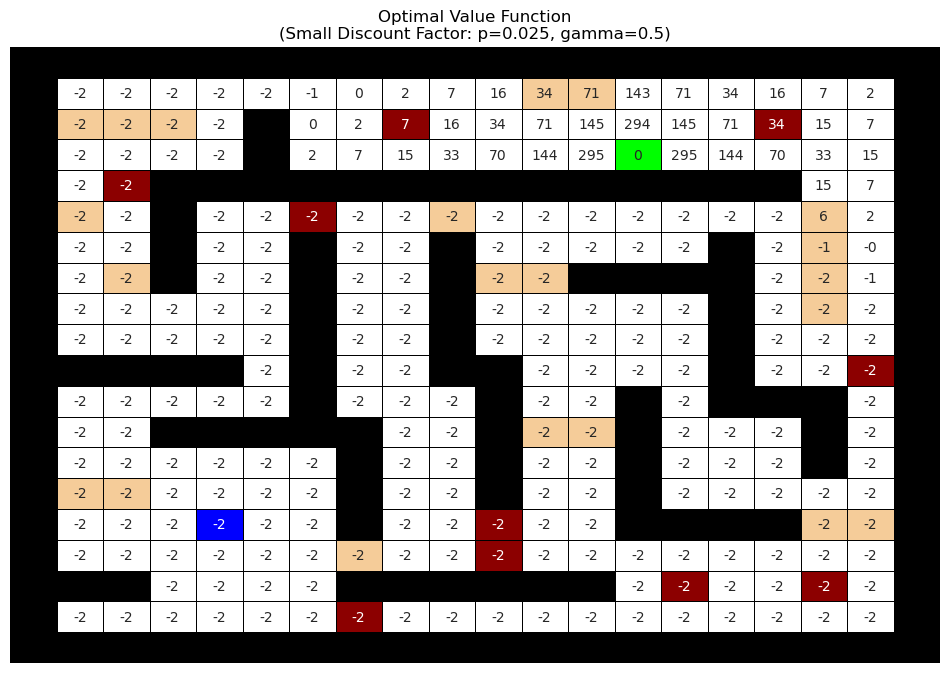

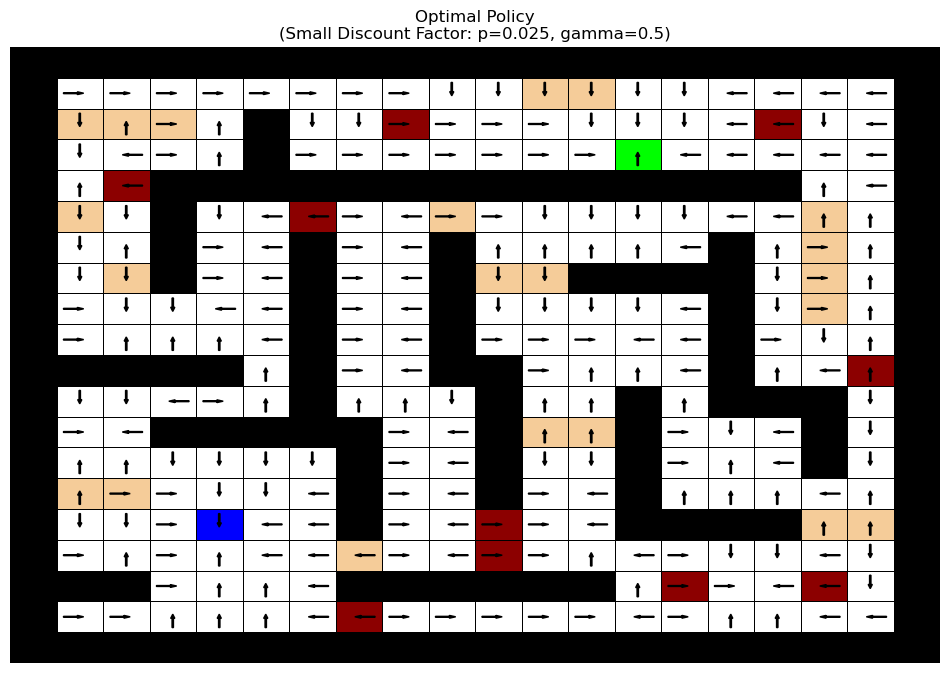

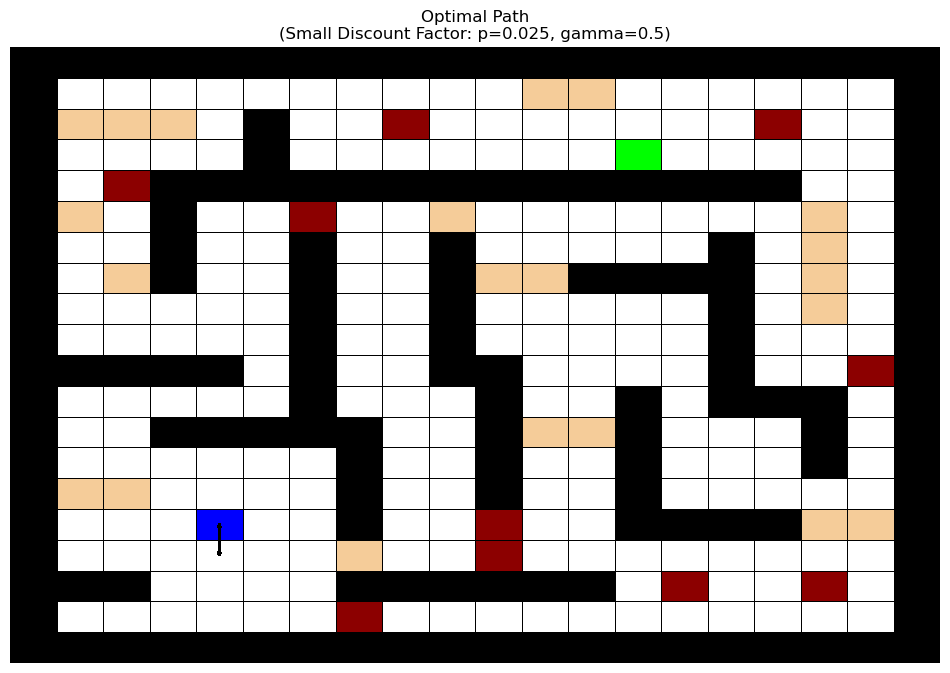

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Defines the maze environment

Env = np.zeros([20, 20])
Env[:, [0]] = 1
Env[:, [19]] = 1
Env[0, :] = 1
Env[19, :] = 1

Env[1, 11] = 3; Env[1, 12] = 3
Env[2, 1:4] = [3, 3, 3]; Env[2, 5] = 1; Env[2, 8] = 2; Env[2, 16] = 2
Env[3, 5] = 1; Env[3, 13] = 5   # Goal cell (5)
Env[4, 2] = 2; Env[4, 3:17] = np.ones([1, 14])
Env[5, 1] = 3; Env[5, 3] = 1; Env[5, 6] = 2; Env[5, 9] = 3; Env[5, 17] = 3
Env[6, 3] = 1; Env[6, 6] = 1; Env[6, 9] = 1; Env[6, 15] = 1; Env[6, 17] = 3
Env[7, 2] = 3; Env[7, 3] = 1; Env[7, 6] = 1; Env[7, 9] = 1
Env[7, 10:12] = [3, 3]; Env[7, 12:16] = np.ones([1, 4]); Env[7, 17] = 3
Env[8, 6] = 1; Env[8, 9] = 1; Env[8, 15] = 1; Env[8, 17] = 3
Env[9, 6] = 1; Env[9, 9] = 1; Env[9, 15] = 1
Env[10, 1:5] = np.ones([1, 4]); Env[10, 6] = 1; Env[10, 9:11] = [1, 1]
Env[10, 15] = 1; Env[10, 18] = 2
Env[11, 6] = 1; Env[11, 10] = 1; Env[11, 13] = 1; Env[11, 15:18] = [1, 1, 1]
Env[12, 3:8] = np.ones([1, 5]); Env[12, 10] = 1; Env[12, 11:13] = [3, 3]
Env[12, 13] = 1; Env[12, 17] = 1
Env[13, 7] = 1; Env[13, 10] = 1; Env[13, 13] = 1; Env[13, 17] = 1
Env[14, 1:3] = [3, 3]; Env[14, 7] = 1; Env[14, 10] = 1; Env[14, 13] = 1
Env[15, 4] = 4; Env[15, 7] = 1; Env[15, 10] = 2; 
Env[15, 13:17] = [1, 1, 1, 1]; Env[15, 17:19] = [3, 3]
Env[16, 7] = 3; Env[16, 10] = 2
Env[17, 1:3] = [1, 1]; Env[17, 7:13] = [1, 1, 1, 1, 1, 1]
Env[17, 14] = 2; Env[17, 17] = 2
Env[18, 7] = 2

# Define the colors for printing the maze

colors = {
    0: [1, 1, 1],        # White
    1: [0, 0, 0],        # Black (Wall)
    2: [0.55, 0, 0],     # Brown (Oil)
    3: [0.96, 0.8, 0.6],  # Bump
    4: [0, 0, 1],        # Green (Start)
    5: [0, 1, 0]         # Blue (Goal)
}

# Function to visualize/print the maze

State_Matrix = np.array([
 [0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0],
 [0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18, 0],
 [0,  19,  20,  21,  22,   0,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35, 0],
 [0,  36,  37,  38,  39,   0,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52, 0],
 [0,  53,  54,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  55,  56, 0],
 [0,  57,  58,   0,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73, 0],
 [0,  74,  75,   0,  76,  77,   0,  78,  79,   0,  80,  81,  82,  83,  84,   0,  85,  86,  87, 0],
 [0,  88,  89,   0,  90,  91,   0,  92,  93,   0,  94,  95,   0,   0,   0,   0,  96,  97,  98, 0],
 [0,  99, 100, 101, 102, 103,   0, 104, 105,   0, 106, 107, 108, 109, 110,   0, 111, 112, 113, 0],
 [0, 114, 115, 116, 117, 118,   0, 119, 120,   0, 121, 122, 123, 124, 125,   0, 126, 127, 128, 0],
 [0,   0,   0,   0,   0, 129,   0, 130, 131,   0,   0, 132, 133, 134, 135,   0, 136, 137, 138, 0],
 [0, 139, 140, 141, 142, 143,   0, 144, 145, 146,   0, 147, 148,   0, 149,   0,   0,   0, 150, 0],
 [0, 151, 152,   0,   0,   0,   0,   0, 153, 154,   0, 155, 156,   0, 157, 158, 159,   0, 160, 0],
 [0, 161, 162, 163, 164, 165, 166,   0, 167, 168,   0, 169, 170,   0, 171, 172, 173,   0, 174, 0],
 [0, 175, 176, 177, 178, 179, 180,   0, 181, 182,   0, 183, 184,   0, 185, 186, 187, 188, 189, 0],
 [0, 190, 191, 192, 193, 194, 195,   0, 196, 197, 198, 199, 200,   0,   0,   0,   0, 201, 202, 0],
 [0, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 0],
 [0,   0,   0, 221, 222, 223, 224,   0,   0,   0,   0,   0,   0, 225, 226, 227, 228, 229, 230, 0],
 [0, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 0],
 [0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0]
])

A_UP, A_RIGHT, A_DOWN, A_LEFT = 0, 1, 2, 3

# Helper functions to ease state to state movement of agent

def create_lookup_tables(State_Matrix):
    rows, cols = State_Matrix.shape
    num_states = np.max(State_Matrix)
    state_to_rc = [None]*(num_states+1)  # 1-indexed: states 1..248
    rc_to_state = {}
    for r in range(rows):
        for c in range(cols):
            s = State_Matrix[r, c]
            if s != 0:
                state_to_rc[s] = (r, c)
                rc_to_state[(r, c)] = s
    return state_to_rc, rc_to_state

def is_wall(r, c, Env):
    rows, cols = Env.shape
    if r < 0 or r >= rows or c < 0 or c >= cols:
        return True
    return (Env[r, c] == 1)

def next_cell(r, c, action):
    if action == A_UP:
        return (r-1, c)
    elif action == A_RIGHT:
        return (r, c+1)
    elif action == A_DOWN:
        return (r+1, c)
    elif action == A_LEFT:
        return (r, c-1)

def get_perpendicular_actions(a):
    if a == A_UP:
        return [A_LEFT, A_RIGHT]
    elif a == A_RIGHT:
        return [A_UP, A_DOWN]
    elif a == A_DOWN:
        return [A_RIGHT, A_LEFT]
    elif a == A_LEFT:
        return [A_DOWN, A_UP]

def find_start_and_goal(Env, rc_to_state):
    s_start, s_goal = None, None
    rows, cols = Env.shape
    for r in range(rows):
        for c in range(cols):
            if Env[r, c] == 4:
                s_start = rc_to_state[(r, c)]
            elif Env[r, c] == 5:
                s_goal = rc_to_state[(r, c)]
    return s_start, s_goal

# Functions to compute and build the transition probabilities and rewards model

def step_reward_and_next_state(s, a, Env, state_to_rc, rc_to_state):
    """
    Returns (s_next, reward).
    If already in goal (cell==5), remain with 0 reward.
    Otherwise:
      - normal step: -1
      - oil: -6 (=-1-5)
      - bump: -11 (=-1-10)
      - hitting wall: remain with -1.8 penalty.
      - stepping into goal: +300.
    """
    (r, c) = state_to_rc[s]
    # Terminal check: if already at goal, remain with 0 reward.
    if Env[r, c] == 5:
        return (s, 0)
    (r_next, c_next) = next_cell(r, c, a)
    if is_wall(r_next, c_next, Env):
        return (s, -1.8)
    else:
        s_next = rc_to_state[(r_next, c_next)]
        cell_type = Env[r_next, c_next]
        if cell_type == 2:
            return (s_next, -6)
        elif cell_type == 3:
            return (s_next, -11)
        elif cell_type == 5:
            return (s_next, 300)
        else:
            return (s_next, -1)

def build_transition_model(Env, p, state_to_rc, rc_to_state):
    """
    Returns:
      P[s, a, s_next] and R[s, a, s_next]
    for s in 1..248, a in {0,1,2,3}.
    """
    num_states = len(state_to_rc)-1  # 248
    P = np.zeros((num_states+1, 4, num_states+1), dtype=np.float32)
    R = np.zeros((num_states+1, 4, num_states+1), dtype=np.float32)
    
    for s in range(1, num_states+1):
        for a in [A_UP, A_RIGHT, A_DOWN, A_LEFT]:
            # Intended move
            s_int, r_int = step_reward_and_next_state(s, a, Env, state_to_rc, rc_to_state)
            # Perpendicular moves
            p_actions = get_perpendicular_actions(a)
            s_p1, r_p1 = step_reward_and_next_state(s, p_actions[0], Env, state_to_rc, rc_to_state)
            s_p2, r_p2 = step_reward_and_next_state(s, p_actions[1], Env, state_to_rc, rc_to_state)
            
            P[s, a, s_int] += (1.0 - p)
            P[s, a, s_p1]  += (p/2.0)
            P[s, a, s_p2]  += (p/2.0)
            
            R[s, a, s_int] = r_int
            R[s, a, s_p1]  = r_p1
            R[s, a, s_p2]  = r_p2
            
    return P, R


# Value Iteration Technique

def value_iteration(P, R, gamma, theta=0.01, s_goal=None):
    """
    P[s,a,s'] = probability, R[s,a,s'] = reward.
    gamma: discount factor; theta: convergence threshold.
    s_goal: goal state index. For s_goal, we force V[s_goal]=0.
    
    Returns:
      V: final value function (length=num_states+1)
      pi: derived policy (greedy from V)
    """
    num_states = P.shape[0]-1  # e.g., 248
    num_actions = 4
    V = np.zeros(num_states+1)
    iteration = 0

    while True:
        iteration += 1
        V_new = np.zeros(num_states+1)
        for s in range(1, num_states+1):
            # Force goal state value to 0.
            if s_goal is not None and s == s_goal:
                V_new[s] = 0
                continue
            best_val = -1e9
            for a in range(num_actions):
                Q_sa = 0
                for s_next in range(1, num_states+1):
                    prob = P[s, a, s_next]
                    if prob > 0:
                        r = R[s, a, s_next]
                        Q_sa += prob * (r + gamma * V[s_next])
                if Q_sa > best_val:
                    best_val = Q_sa
            V_new[s] = best_val
        delta = np.max(np.abs(V_new - V))
        V = V_new
        if delta < theta:
            print(f"Value Iteration converged at iteration {iteration}")
            break

    # Extract policy:
    pi = np.zeros(num_states+1, dtype=int)
    for s in range(1, num_states+1):
        if s_goal is not None and s == s_goal:
            pi[s] = 0
            continue
        best_a = 0
        best_val = -1e9
        for a in range(num_actions):
            Q_sa = 0
            for s_next in range(1, num_states+1):
                prob = P[s, a, s_next]
                if prob > 0:
                    r = R[s, a, s_next]
                    Q_sa += prob * (r + gamma * V[s_next])
            if Q_sa > best_val:
                best_val = Q_sa
                best_a = a
        pi[s] = best_a

    return V, pi

def extract_path(pi, s_start, s_goal, P, R, gamma, max_steps=500):

    # Follow the deterministic intended transition (using max(probability)).
    
    path = []
    s = s_start
    for _ in range(max_steps):
        path.append(s)
        if s == s_goal:
            break
        a = pi[s]
        row = P[s, a, :]
        s_next = np.argmax(row)
        if s_next == s:
            break
        s = s_next
    return path

# Visualize the maze with optimal state values, optimal policy and the optimal path

def plot_value_function(V, State_Matrix, Env, title="Value Function"):
    ann = np.full_like(State_Matrix, "", dtype=object)
    rows, cols = State_Matrix.shape
    for r in range(rows):
        for c in range(cols):
            s = State_Matrix[r, c]
            if s != 0:
                ann[r, c] = f"{V[s]:.0f}"
    plt.figure(figsize=(12, 8))
    sns.heatmap(Env, fmt="", cmap=sns.color_palette([colors[i] for i in range(6)]),
                cbar=False, annot=ann, linewidths=0.5, linecolor='black')
    plt.axis('off')
    plt.title(title)
    plt.show()

def plot_policy(pi, State_Matrix, Env, title="Policy"):
    plt.figure(figsize=(12, 8))
    sns.heatmap(Env, fmt="", cmap=sns.color_palette([colors[i] for i in range(6)]),
                cbar=False, annot=False, linewidths=0.5, linecolor='black')
    plt.axis('off')
    plt.title(title)
    rows, cols = State_Matrix.shape
    for r in range(rows):
        for c in range(cols):
            s = State_Matrix[r, c]
            if s != 0:
                a = pi[s]
                if a == A_UP:
                    plt.arrow(c+0.5, r+0.85, 0, -0.3, width=0.03, color='black')
                elif a == A_RIGHT:
                    plt.arrow(c+0.15, r+0.5, 0.3, 0, width=0.03, color='black')
                elif a == A_DOWN:
                    plt.arrow(c+0.5, r+0.15, 0, 0.3, width=0.03, color='black')
                elif a == A_LEFT:
                    plt.arrow(c+0.85, r+0.5, -0.3, 0, width=0.03, color='black')
    plt.show()

def plot_path(path, State_Matrix, state_to_rc, Env, title="Optimal Path"):
    plt.figure(figsize=(12, 8))
    sns.heatmap(Env, fmt="", cmap=sns.color_palette([colors[i] for i in range(6)]),
                cbar=False, annot=False, linewidths=0.5, linecolor='black')
    plt.axis('off')
    plt.title(title)
    for i in range(len(path)-1):
        s = path[i]
        s_next = path[i+1]
        (r, c) = state_to_rc[s]
        (r_next, c_next) = state_to_rc[s_next]
        plt.arrow(c+0.5, r+0.5, (c_next-c), (r_next-r),
                  length_includes_head=True, width=0.02, color='black')
    plt.show()

# Implement Value Iteration for the Base, Large Stochasticity and Small Discount Factor Scenarios

def main():
    # Build lookup tables
    state_to_rc, rc_to_state = create_lookup_tables(State_Matrix)
    num_states = np.max(State_Matrix)  # 248
    s_start, s_goal = find_start_and_goal(Env, rc_to_state)
    
    # Define the three scenarios
    scenarios = [
        {"p": 0.025, "gamma": 0.99, "theta": 0.01, "name": "Base Scenario"},
        {"p": 0.4,   "gamma": 0.99, "theta": 0.01, "name": "Large Stochasticity"},
        {"p": 0.025, "gamma": 0.5,  "theta": 0.01, "name": "Small Discount Factor"}
    ]
    
    for sc in scenarios:
        p = sc["p"]
        gamma = sc["gamma"]
        theta = sc["theta"]
        name = sc["name"]
        
        # Build transition model
        P, R = build_transition_model(Env, p, state_to_rc, rc_to_state)
        
        # Run value iteration, forcing goal state value to 0 by passing s_goal.
        V, pi = value_iteration(P, R, gamma, theta, s_goal=s_goal)
        
        # Plot value function
        plot_value_function(V, State_Matrix, Env,
            title=f"Optimal Value Function\n({name}: p={p}, gamma={gamma})")
        
        # Plot policy
        plot_policy(pi, State_Matrix, Env,
            title=f"Optimal Policy\n({name}: p={p}, gamma={gamma})")
        
        # Extract and plot optimal path
        path_states = extract_path(pi, s_start, s_goal, P, R, gamma)
        plot_path(path_states, State_Matrix, state_to_rc, Env,
            title=f"Optimal Path\n({name}: p={p}, gamma={gamma})")
        
if __name__ == "__main__":
    main()